In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [ ]:
dataset = pd.read_csv('Obesity Classification Edited.csv')
dataset.drop('ID', inplace=True, axis=1)
print('Sample Data:')
dataset.head(26)

Sample Data:


,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,2,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,2,Berat,Kecil,20,Underweight
4,45,1,190,100,31.2,Obese
5,50,2,140,40,Lumayan,Underweight
6,55,1,200,110,34.2,Obese
7,60,2,130,30,13.3,Underweight
8,65,1,NaN,120,37.2,Obese
9,70,2,120,20,10,Underweight


In [ ]:
print(dataset['Height'].isna().sum())

1


In [ ]:
dataset['Height'].fillna(210, inplace=True)
print(dataset['Height'].isna().sum())

0


In [ ]:
print(dataset['Weight'].isna().sum())

1


In [ ]:
dataset['Weight'].fillna(60, inplace=True)
print(dataset['Weight'].isna().sum())

0


In [ ]:
print(dataset['BMI'].isna().sum())

1


In [ ]:
dataset['BMI'].fillna(16.7, inplace=True)
print(dataset['BMI'].isna().sum())

0


In [ ]:
dataset.isna().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [ ]:
print('Sample Data:')
dataset.head(26)

Sample Data:


,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,2,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,2,Berat,Kecil,20,Underweight
4,45,1,190,100,31.2,Obese
5,50,2,140,40,Lumayan,Underweight
6,55,1,200,110,34.2,Obese
7,60,2,130,30,13.3,Underweight
8,65,1,210,120,37.2,Obese
9,70,2,120,20,10,Underweight


In [ ]:
dataset['Height'].replace(['Berat'], ['150'], inplace=True)
dataset['Weight'].replace(['Kecil'], ['50'], inplace=True)
dataset['BMI'].replace(['Lumayan'], ['16.7'], inplace=True)

In [ ]:
print('Sample Data:')
dataset.head(26)

Sample Data:


,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,2,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,2,150,50,20,Underweight
4,45,1,190,100,31.2,Obese
5,50,2,140,40,16.7,Underweight
6,55,1,200,110,34.2,Obese
7,60,2,130,30,13.3,Underweight
8,65,1,210,120,37.2,Obese
9,70,2,120,20,10,Underweight


In [ ]:
dataset.dtypes

Age        int64
Gender     int64
Height    object
Weight    object
BMI       object
Label     object
dtype: object

In [ ]:
X = dataset.drop('Label', axis=1)
y = dataset['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = RFclassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


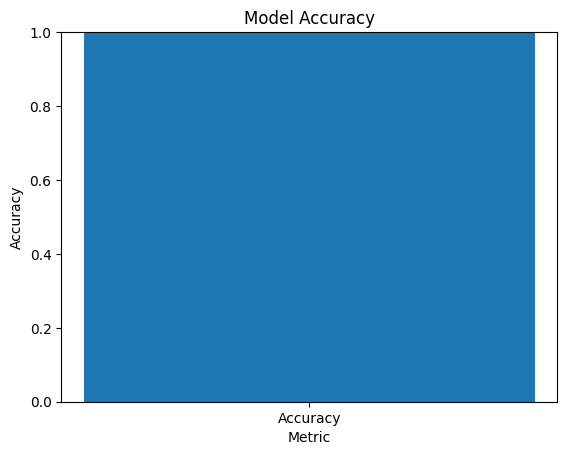

In [ ]:
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.xlabel('Metric')
plt.ylabel('Accuracy')
plt.show()

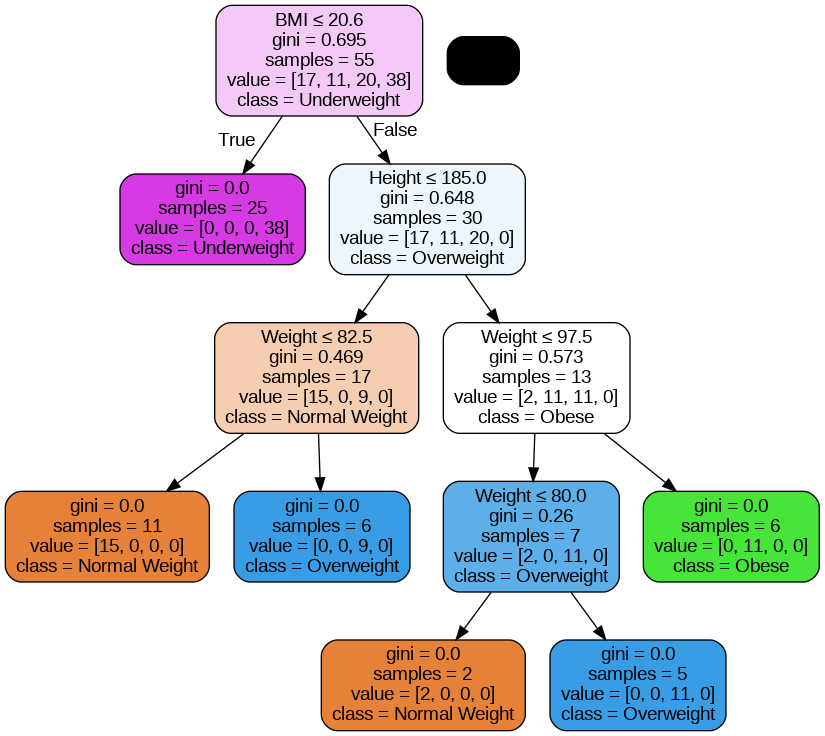

In [ ]:
tree = RFclassifier.estimators_[1]  # Mengambil satu pohon keputusan dari ensemble
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=RFclassifier.classes_,
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
dataset['Height'] = pd.to_numeric(dataset['Height'], errors='coerce')
dataset['Weight'] = pd.to_numeric(dataset['Weight'], errors='coerce')
dataset['BMI'] = pd.to_numeric(dataset['BMI'], errors='coerce')

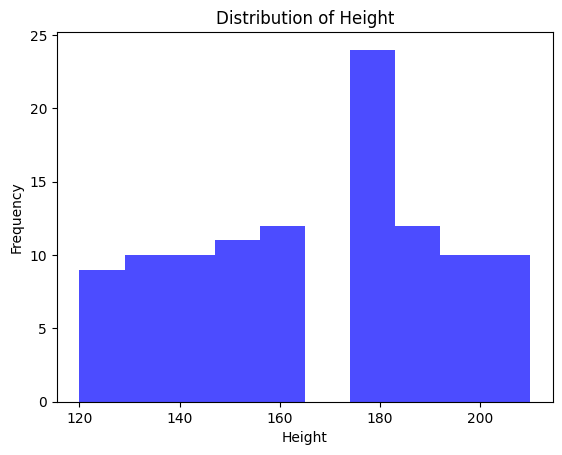

In [ ]:
plt.hist(dataset['Height'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

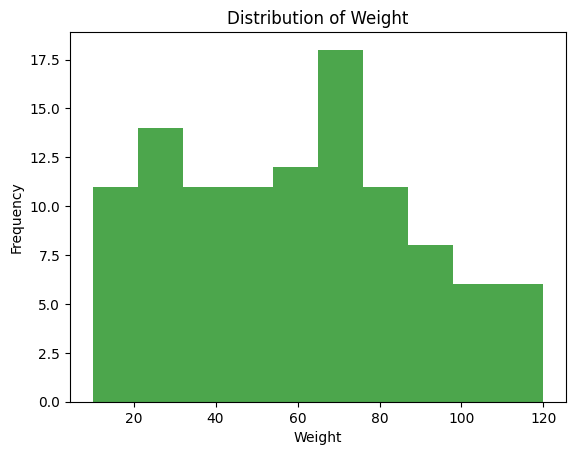

In [ ]:
plt.hist(dataset['Weight'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

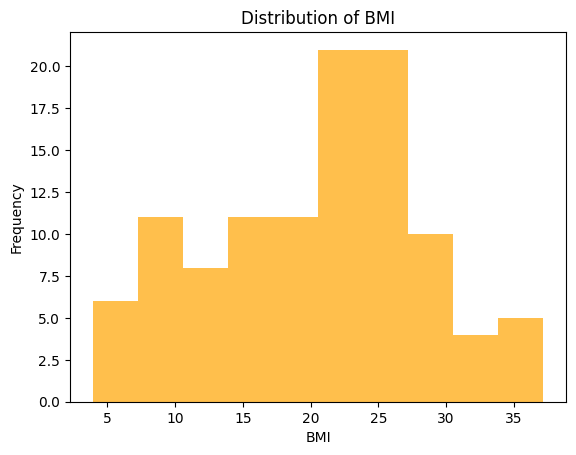

In [ ]:
plt.hist(dataset['BMI'], bins=10, color='orange', alpha=0.7)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()